# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


df_two_classes = pd.read_csv('../lab2/task1_df.csv')

MSE train: 0.027, test: 0.027
R^2 train: 0.891, test: 0.892


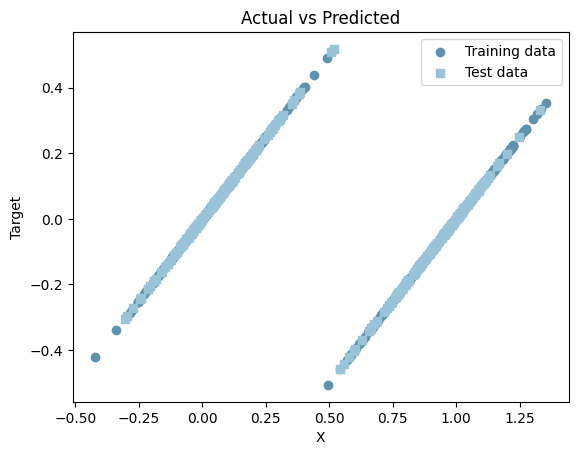

In [63]:
X = df_two_classes[['x', 'y']]  
y = df_two_classes['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'MSE train: {mse_train:.3f}, test: {mse_test:.3f}')
print(f'R^2 train: {r2_train:.3f}, test: {r2_test:.3f}')


plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
# plt.scatter(X_test['x'], y_test, color='black', label='Actual data')
# plt.scatter(X_test['x'], y_test_pred, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('Target')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

k=2 99.86 (+/- 0.43)
k=3 99.86 (+/- 0.43)
k=4 99.86 (+/- 0.43)
k=5 99.86 (+/- 0.43)
k=6 99.86 (+/- 0.43)
k=7 99.71 (+/- 0.57)
k=8 99.71 (+/- 0.57)
k=9 99.86 (+/- 0.43)
k=10 99.86 (+/- 0.43)
k=11 99.86 (+/- 0.43)
k=12 99.71 (+/- 0.57)
k=13 99.71 (+/- 0.57)
k=14 99.71 (+/- 0.57)
k=15 99.71 (+/- 0.57)
k=16 99.71 (+/- 0.57)
k=17 99.86 (+/- 0.43)
k=18 99.86 (+/- 0.43)
k=19 99.86 (+/- 0.43)
k=20 99.86 (+/- 0.43)
k=21 99.86 (+/- 0.43)
k=22 99.86 (+/- 0.43)
k=23 99.86 (+/- 0.43)
k=24 99.86 (+/- 0.43)
k=25 99.86 (+/- 0.43)
The optimal number of neighbors is 2 with 99.9%


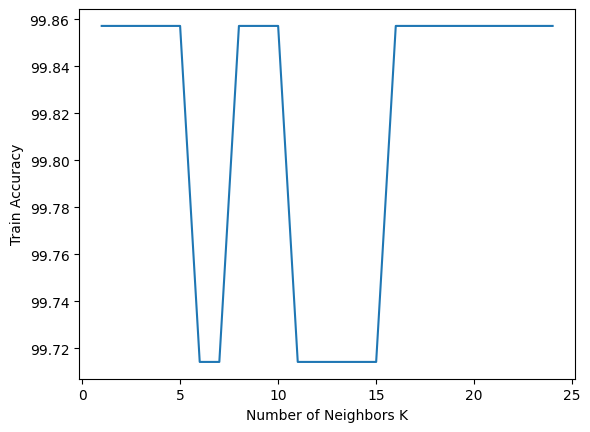

In [96]:
X = df_two_classes[['x', 'y']]
y = df_two_classes['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

neighbors = np.arange(1,25)

cv_scores = []
k_fold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)


for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k + 1, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

# print(f'Accuracy train: {accuracy_train:.2f}, test: {accuracy_test:.2f}')
# print(f'Classification Report (test):')
# print(classification_report(y_test, y_test_pred))

# cm = confusion_matrix(y_test, y_test_pred)
# plt.figure(figsize=(10,7))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

In [65]:
# code

In [66]:
# code

In [67]:
# code

**Аналіз отриманих результатів**:

1.   ...
2.   ...
3.   ...  



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [68]:
# code

In [69]:
# code

In [70]:
# code

In [71]:
# code

In [72]:
# code

**Аналіз отриманих результатів**:

1.   ...
2.   ...
3.   ...  



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [73]:
# code

In [74]:
# code

In [75]:
# code

In [76]:
# code

In [77]:
# code

**Аналіз отриманих результатів**:

1.   ...
2.   ...
3.   ...  

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [78]:
# code

In [79]:
# code

In [80]:
# code

In [81]:
# code

In [82]:
# code

**Аналіз отриманих результатів**:

1.   ...
2.   ...
3.   ...  